In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler

In [103]:
df= pd.read_csv('stage2.csv',index_col=0)

In [104]:
df.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2)
0,Afghanistan,2000,1.613591,6.2,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,3.861703,4413.062005,60.0,652230.0
1,Afghanistan,2001,4.074574,7.2,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,3.861703,4413.062005,60.0,652230.0
2,Afghanistan,2002,9.409158,8.2,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,3.861703,179.426579,60.0,652230.0
3,Afghanistan,2003,14.738506,9.5,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60.0,652230.0
4,Afghanistan,2004,20.064968,10.9,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60.0,652230.0


In [105]:
df= df.drop(['Land Area(Km2)','Density\\n(P/Km2)'],axis=1)

In [38]:
unique_years = df['Year'].unique()
total_by_year = df.groupby('Year')['Value_co2_emissions_kt_by_country'].sum()
for year in unique_years:
    df.loc[df['Year'] == year, 'Value_co2_emissions_kt_by_country'] = df[df['Year'] == year]['Value_co2_emissions_kt_by_country'] / total_by_year[year] * 100


In [106]:
unique_years = df['Year'].unique()
cols= list(df.columns)
cols.remove('Entity')
cols.remove('Year')
for col in cols:
    total_by_year = df.groupby('Year')[col].sum()
    for year in unique_years:
        df.loc[df['Year'] == year, col] = df[df['Year'] == year][col] / total_by_year[year] * 100

    

    


<AxesSubplot:>

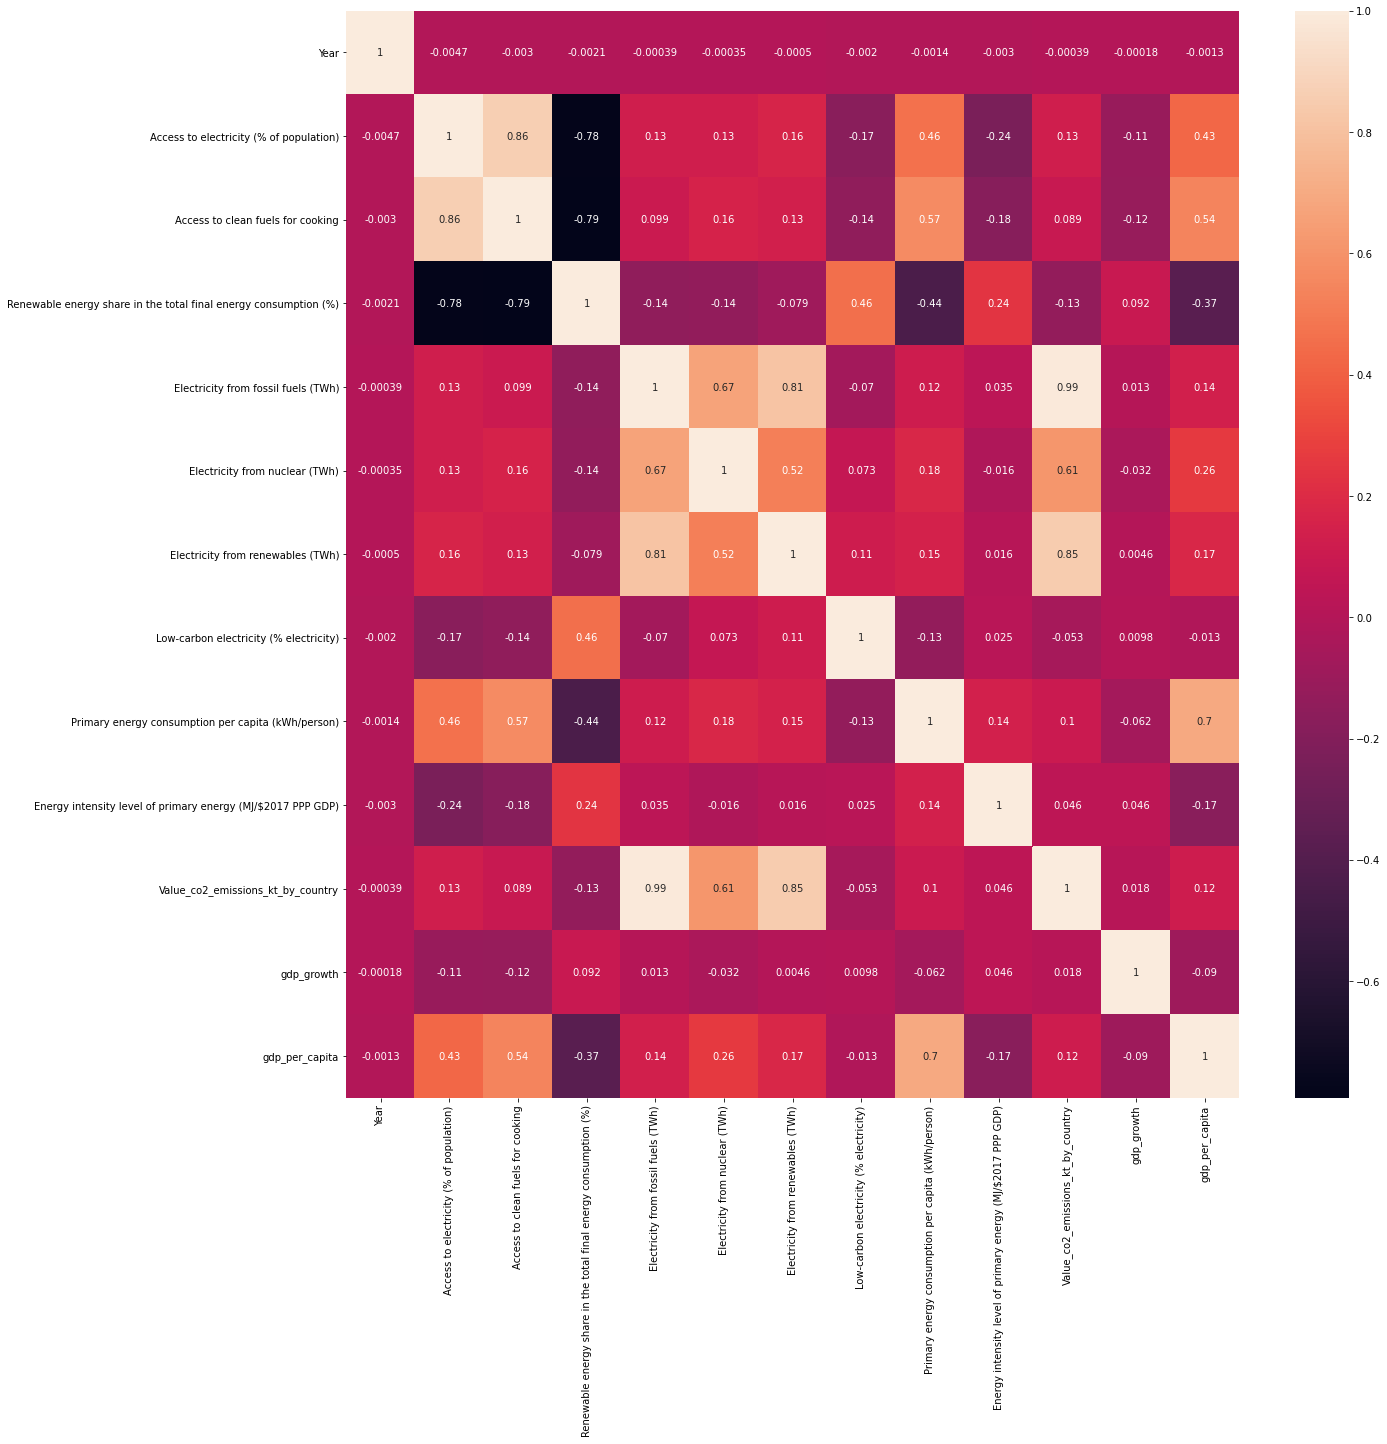

In [60]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot= True)

In [113]:
df_t= df[df['Year']==2019].drop(['Entity','Year'],axis=1)

In [114]:
X= df_t.drop('Value_co2_emissions_kt_by_country',axis= 1)
y= df_t['Value_co2_emissions_kt_by_country']

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [116]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [117]:
lasso_model = Lasso(alpha=1.0)  
lasso_model.fit(X_train_scaled, y_train)
predictions = lasso_model.predict(X_test_scaled)

In [119]:
print("mean absolute error",mean_absolute_error(y_test,predictions))
print("r2 score",r2_score(y_test,predictions))
print("mean squared error",mean_squared_error(y_test,predictions))
print("root mean square error",np.sqrt(mean_squared_error(y_test,predictions)))
print("mean absoute percentage error",mean_absolute_percentage_error(y_test,predictions))

mean absolute error 0.8479392160789226
r2 score 0.5380017434006146
mean squared error 12.715473866007384
root mean square error 3.5658763110920413
mean absoute percentage error 44.07442585725169


In [122]:
df_t= df.drop(['Entity','Year'],axis=1)

In [123]:
X= df_t.drop('Value_co2_emissions_kt_by_country',axis= 1)
y= df_t['Value_co2_emissions_kt_by_country']

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [125]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [126]:
lasso_model = Lasso(alpha=1.0)  
lasso_model.fit(X_train_scaled, y_train)
predictions = lasso_model.predict(X_test_scaled)

In [127]:
print("mean absolute error",mean_absolute_error(y_test,predictions))
print("r2 score",r2_score(y_test,predictions))
print("mean squared error",mean_squared_error(y_test,predictions))
print("root mean square error",np.sqrt(mean_squared_error(y_test,predictions)))
print("mean absoute percentage error",mean_absolute_percentage_error(y_test,predictions))

mean absolute error 0.31860892426766024
r2 score 0.8780487509269295
mean squared error 1.0886874449605193
root mean square error 1.0434018616815475
mean absoute percentage error 70.59947005274398


In [130]:
lasso_model.coef_

array([ 0.        ,  0.        , -0.        ,  1.88751716,  0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        ])

In [131]:
df= df[['Electricity from fossil fuels (TWh)','Value_co2_emissions_kt_by_country']]

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

,Electricity from fossil fuels (TWh),Value_co2_emissions_kt_by_country
0,0.001924,0.003800
1,0.001060,0.003586
2,0.001465,0.004991
3,0.003312,0.005635
4,0.003379,0.004538
...,...,...
3643,0.029681,0.043443
3644,0.025458,0.038517
3645,0.021776,0.035709
3646,0.025786,0.041835


mean absolute error 0.49483596552436815
r2 score 0.5600595775173168
mean squared error 3.1708055126469374
root mean square error 1.780675577596025
mean absoute percentage error 95.29362923367758


26.139044730616163

array([ 0.        ,  0.        , -0.        ,  0.59773404,  0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.        ,
        0.        ])

0       0.001924
1       0.001060
2       0.001465
3       0.003312
4       0.003379
          ...   
3643    0.029681
3644    0.025458
3645    0.021776
3646    0.025786
3647    0.025402
Name: Electricity from fossil fuels (TWh), Length: 3221, dtype: float64

0       0.001924
1       0.001060
2       0.001465
3       0.003312
4       0.003379
          ...   
3643    0.029681
3644    0.025458
3645    0.021776
3646    0.025786
3647    0.025402
Name: Electricity from fossil fuels (TWh), Length: 3221, dtype: float64

SyntaxError: invalid syntax (<ipython-input-28-f1ce94df004c>, line 1)